In [144]:
import warnings
warnings.filterwarnings('ignore')

In [145]:
from sklearn.preprocessing import StandardScaler#표준화(평균을 기준)
from sklearn.preprocessing import MinMaxScaler#정규화
from sklearn.datasets import load_iris


from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

import pandas as pd
import numpy as np
import seaborn as sns
from pandas.plotting import parallel_coordinates
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.font_manager as fm
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from IPython.display import Image
fm._rebuild()
fm.get_fontconfig_fonts()

# 디렉토리 및 파일 이름에 맞추어 변경
font_location = '../NanumSquareRoundEB.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
rc('font', family=font_name)



In [146]:
iris = load_iris()
iris  #dictionary를 wrapping
type(iris)

sklearn.utils.Bunch

In [147]:
iris.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [148]:
iris.target


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [149]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species']=iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [150]:
df['species'] = df['species'].astype('category')

In [151]:
df['species'] = df['species'].cat.rename_categories(iris.target_names)
df['species']

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: category
Categories (3, object): [setosa, versicolor, virginica]

In [152]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [153]:
df.groupby('species').size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

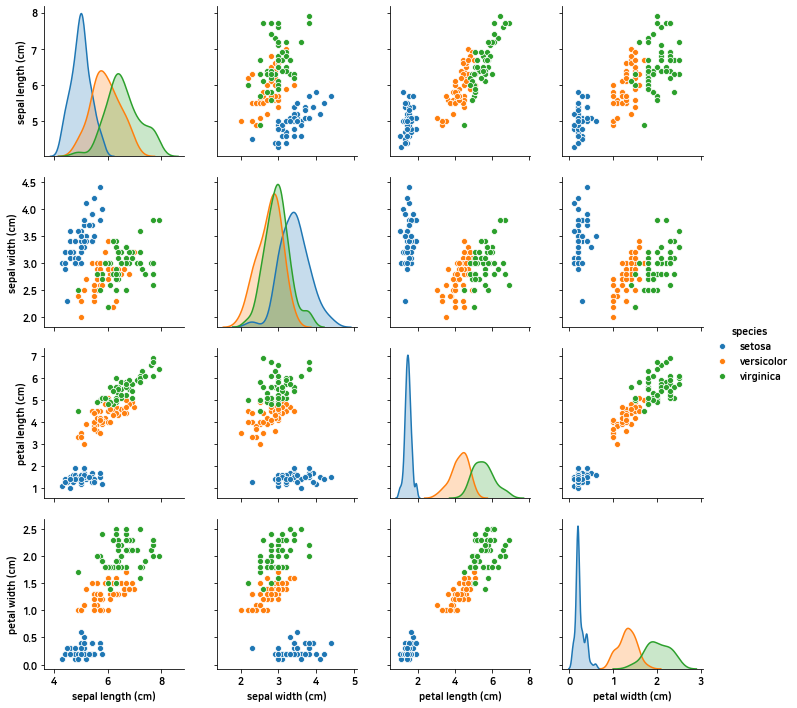

In [154]:
sns.pairplot(df, hue='species')

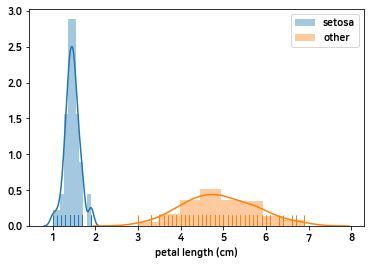

In [155]:
sns.distplot(df[df.species == "setosa"]["petal length (cm)"], hist=True, rug=True, label="setosa")
sns.distplot(df[df.species != "setosa"]["petal length (cm)"], hist=True, rug=True, label="other")
plt.legend()

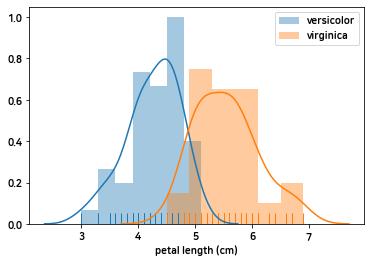

In [156]:
sns.distplot(df[df.species == "versicolor"]["petal length (cm)"], hist=True, rug=True, label="versicolor")
sns.distplot(df[df.species == "virginica"]["petal length (cm)"], hist=True, rug=True, label="virginica")
plt.legend()

#### petal length (cm)에 따른 종

setosa의 꽃잎의 길이가 제일 짧고 virginica가 제일 길다. 
길이가 1.5 이하인것은 모두 setosa라고 볼 수 있다.
versicolor와 virginica는 비슷한 길이를 보이나, virginica가 좀 더 길다는 것을 알 수 있다.
그러나 종을 판별하기위한 절대적인 기준은 되지 못한다. 

### -----------------------------------------------------------------------------------------------------------------------------------------------

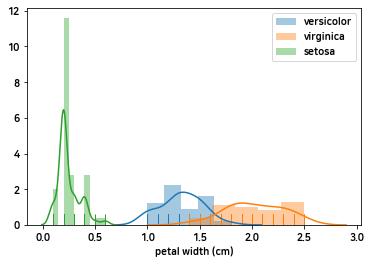

In [157]:
sns.distplot(df[df.species == "versicolor"]["petal width (cm)"], hist=True, rug=True, label="versicolor")
sns.distplot(df[df.species == "virginica"]["petal width (cm)"], hist=True, rug=True, label="virginica")
sns.distplot(df[df.species == "setosa"]["petal width (cm)"], hist=True, rug=True, label="setosa")
plt.legend()

#### petal width (cm)

꽃잎의 너비를 비교해보니 setosa가 가장 작은 꽃. 전체적인 꽃잎의 크기는 virginca가 제일 크다. 
꽃잎의 너비가 다른 꽃보다 상대적으로 많이 setosa가 작으므로 1미만은 모두 setosa라고 볼 수 있다. 
꽃잎의 너비는 iris품종을 분류하기에 적합한 항목이 된다.

### -----------------------------------------------------------------------------------------------------------------------------------------------

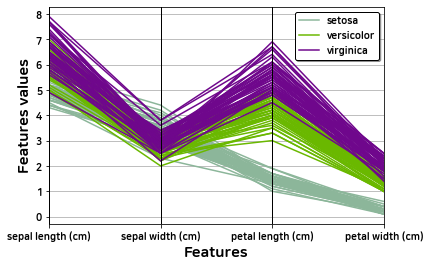

In [158]:
parallel_coordinates(df, "species")
plt.xlabel('Features', fontsize=15)
plt.ylabel('Features values', fontsize=15)
plt.legend(loc=1, prop={'size': 10}, frameon=True, shadow=True, facecolor="white", edgecolor="black")

##### sepal length (cm), sepal width (cm) 는 품종을 결정하는데 주요 항목이 아닌듯. 제거해도 될것같음.

sepal length (cm), sepal width (cm)는 각각 항목별로 꽃들이 어떤 차이를 가지는지의 범위를 표준화시켜 비교해보자.

In [159]:
ss=StandardScaler() # 표준(평균값기준)

In [160]:
ss.fit_transform(df.iloc[:,:-1])[:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [161]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df.iloc[:,-1], test_size=0.2, random_state=3)
#인덱스에 -1을 주면 마지막 칼럼의 값을 가져옴

In [170]:
#표준화 기준으로 인코딩
X_train_s = pd.DataFrame(ss.fit_transform(X_train), columns= X_train.columns)
X_train_s

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.047177,2.167274,-1.458816,-1.314062
1,-1.305219,0.770284,-1.059140,-1.314062
2,1.336670,0.071790,0.939237,1.197306
3,0.959257,-0.393873,0.482465,0.139888
4,-1.808435,-0.393873,-1.344623,-1.314062
...,...,...,...,...
115,1.839886,-0.393873,1.453106,0.800774
116,-0.927806,1.468779,-1.287526,-1.049708
117,-0.927806,1.003116,-1.344623,-1.314062
118,2.594712,1.701611,1.510202,1.065128


In [171]:
X_test_s = pd.DataFrame(ss.transform(X_test), columns=X_test.columns) 
X_test_s 
y_test.value_counts()

virginica     10
versicolor    10
setosa        10
Name: species, dtype: int64

스케일링 할때 전체데이터나 훈련데이터로 평균 (fit)를 시키고 절대 검증데이터로fit 시키지 않는다. 
훈련데이터와 검증데이터의 스케일링 기준이 달라지기 때문이다. 

In [180]:
ms = MinMaxScaler()

In [181]:
X_train_m = pd.DataFrame(ms.fit_transform(X_train), columns= X_train.columns)
X_train_m

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.416667,0.909091,0.035088,0.041667
1,0.138889,0.636364,0.157895,0.041667
2,0.722222,0.500000,0.771930,0.833333
3,0.638889,0.409091,0.631579,0.500000
4,0.027778,0.409091,0.070175,0.041667
...,...,...,...,...
115,0.833333,0.409091,0.929825,0.708333
116,0.222222,0.772727,0.087719,0.125000
117,0.222222,0.681818,0.070175,0.041667
118,1.000000,0.818182,0.947368,0.791667


In [182]:
X_test_m = pd.DataFrame(ms.transform(X_test), columns=X_test.columns) 
X_test_m 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.083333,0.545455,0.070175,0.041667
1,0.083333,0.500000,0.087719,0.041667
2,0.305556,0.636364,0.087719,0.125000
3,0.194444,0.454545,0.105263,0.041667
4,0.388889,1.090909,0.087719,0.125000
5,0.944444,0.272727,1.035088,0.916667
6,0.333333,0.227273,0.526316,0.500000
7,0.083333,0.636364,0.070175,0.083333
8,0.555556,0.409091,0.807018,0.708333
9,0.666667,0.500000,0.596491,0.541667


In [183]:
a= ms.fit_transform(df.iloc[:,:-1])
a
mdf = pd.DataFrame(a, columns=iris.feature_names)

In [184]:
mdf['species']=iris.target
mdf['species'] = mdf['species'].astype('category')
mdf['species'] = mdf['species'].cat.rename_categories(iris.target_names)
mdf['species']

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: category
Categories (3, object): [setosa, versicolor, virginica]

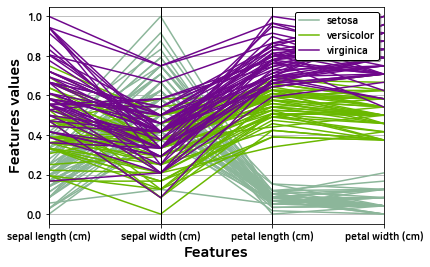

In [185]:
parallel_coordinates(mdf, "species")
plt.xlabel('Features', fontsize=15)
plt.ylabel('Features values', fontsize=15)
plt.legend(loc=1, prop={'size': 10}, frameon=True, shadow=True, facecolor="white", edgecolor="black")

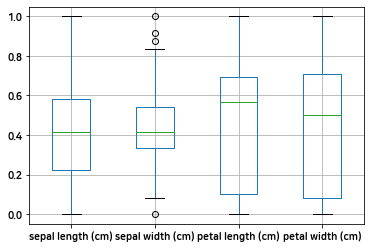

In [192]:
# df.boxplot()
mdf.boxplot()

### -----------------------------------------------------------------------------------------------------------------------------------------------

cross_val_score: 다양한 샘플링을 해서 여러 번 테스트 

In [237]:
knn=KNeighborsClassifier()
knn
id(knn)#참조형 knn

2710590134984

In [238]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [239]:
#샘플링을 10개해서 10번 검증을 해보세요!의미..... 
#X_train을 train data, validation data로 나눈다. 
#cv(fold값)가 10이면 validation data를 X_train의 1/10으로 잡음. 
#validation data의 개수는 12개 나머지가 train data... 

scores = cross_val_score(knn, X_train, y_train, cv=10)
print(scores)

[0.91666667 0.91666667 0.91666667 1.         1.         1.
 1.         1.         1.         0.91666667]


In [240]:
np.mean(scores)

0.9666666666666666

In [241]:
pred= knn.predict(X_test)
acc=accuracy_score(y_test,pred)
acc

0.9666666666666667

In [268]:
def print_metrics(model, x, y,m=10):
    
    scores = cross_val_score(model, x,y, cv=m)
    acc_mean = np.mean(scores)
    print("교차검증결과: {}".format(scores))
    print("교차검증결과: {:.2f}".format(np.mean(scores)))
    
    return scores, acc_mean
    

In [269]:
print_metrics(knn, X_train, y_train,5)

교차검증결과: [0.91666667 0.95833333 1.         1.         0.95833333]
교차검증결과: 0.97


(array([0.91666667, 0.95833333, 1.        , 1.        , 0.95833333]),
 0.9666666666666666)

교차검증결과: [0.91666667 0.95833333 1.         1.         0.95833333]
교차검증결과: 0.97


(array([1., 0., 0., 0., 0., 2., 0., 0., 0., 2.]),
 array([0.91666667, 0.925     , 0.93333333, 0.94166667, 0.95      ,
        0.95833333, 0.96666667, 0.975     , 0.98333333, 0.99166667,
        1.        ]),
 <a list of 10 Patch objects>)

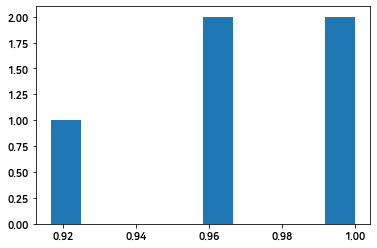

In [273]:
sc2, mn2=print_metrics(knn, X_train, y_train,5)
plt.hist(sc2)

In [261]:
##스케일링한 데이터로 knn fit... 

교차검증결과: [0.95833333 0.95833333 0.95833333 0.95833333 0.875     ]
교차검증결과: 0.94


(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 4.]),
 array([0.875     , 0.88333333, 0.89166667, 0.9       , 0.90833333,
        0.91666667, 0.925     , 0.93333333, 0.94166667, 0.95      ,
        0.95833333]),
 <a list of 10 Patch objects>)

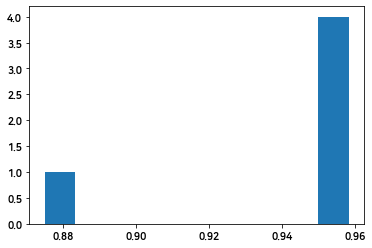

In [276]:
knn1=KNeighborsClassifier()
knn1.fit(X_train_s, y_train)
s3, mn3=print_metrics(knn1, X_train_s, y_train,5)
plt.hist(s3)

In [280]:
pred1= knn1.predict(X_test_s)
acc1=accuracy_score(y_test,pred)
acc1

0.9666666666666667

교차검증결과: [0.875      0.95833333 0.95833333 1.         0.91666667]
교차검증결과: 0.94


(array([1., 0., 0., 1., 0., 0., 2., 0., 0., 1.]),
 array([0.875 , 0.8875, 0.9   , 0.9125, 0.925 , 0.9375, 0.95  , 0.9625,
        0.975 , 0.9875, 1.    ]),
 <a list of 10 Patch objects>)

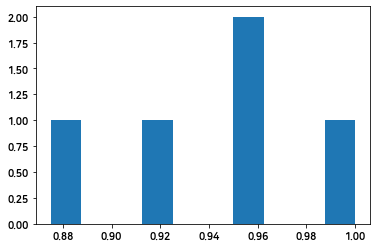

In [281]:
knn2=KNeighborsClassifier()
knn2.fit(X_train_m, y_train)
s2, mn2=print_metrics(knn2, X_train_m, y_train,5)
plt.hist(s2)

In [282]:
pred2 = knn2.predict(X_test_m)
acc2 = accuracy_score(y_test,pred)
acc2

0.9666666666666667

In [283]:
#모델링 선정할때 사용, 다양한 모델을 교차검증을 통해서 대략적으로 선정함. 
#대략적 모델 2~3개를 선정했다고 가정. 모델마다 최적의 하이퍼 파라매터가 무엇인지 찾아주는것이 grid-search

In [291]:
grid_params={
    "n_neighbors": list(range(1,20)), "weights":["uniform", "distance"], "metric":["euclidean", "manhattan", "minkowski"]
    
}

In [292]:
gs_model= GridSearchCV(knn, grid_params, cv=5)
gs_model.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [293]:
gs_model.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [298]:
gs_model.best_score_

0.9666666666666667

In [297]:
gs_model.best_params_

{'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}

In [309]:
gs_m = GridSearchCV(knn2, grid_params, cv=10)
gs_m.fit(X_train_m, y_train)
print("Best Parameters : ", gs_m.best_params_)
print("Best Score : ", gs_m.best_score_)
print("Best Test Score : ", gs_m.score(X_test_m, y_test))

Best Parameters :  {'metric': 'euclidean', 'n_neighbors': 12, 'weights': 'uniform'}
Best Score :  0.975
Best Test Score :  0.9666666666666667


In [310]:
##GRID_SEARCH를 통해서 최적의 파라미터를 찾음. 

In [321]:
best_knn = KNeighborsClassifier(
    metric = 'manhattan', 
    n_neighbors = 14, 
    weights = 'uniform')
best_knn.fit(X_train, y_train) #문제+답 훈련!!!

######test로 예측한 결과값######
pred3 = best_knn.predict(X_test) #모의고사=>작성한 답
acc3 = accuracy_score(y_test, pred3) #작성한 답과 실제답안지 비교
acc3

1.0

In [338]:
def print_test_metrics(model, X_test):
    print('*** Test Accuracy *** \n   {}'.format(model.score(X_test, y_test)))
    print('\n*** Confusion Matrix *** \n', confusion_matrix(y_test, model.predict(X_test)))
    print('*** Confusion Matrix(precision) ***')
    print(precision_score(y_test, pred3, average='macro'))
    print('***classification re(precision) ***')
    print(classification_report(y_test, pred))

In [339]:
print_test_metrics(knn2, X_test_m)

*** Test Accuracy *** 
   0.9666666666666667

*** Confusion Matrix *** 
 [[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]
*** Confusion Matrix(precision) ***
1.0
***classification re(precision) ***
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.91      1.00      0.95        10
   virginica       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [340]:
# # 정확도 96% 혼돈행렬 결과 ... 3가지를 분류하랫는데 마지막 versicolor라고 분류해야할걸 virginica로분류

# ## Confusion Matrix ##
#            /  setosa   versicolor    virginica
# setosa          7         2            1
# versicolor      2         6            1
# virginica       1         4            6

# 한 열은 estimator가 예측한 값
# 한 행은 실제 값
    
#  [[7,2,1]   setosa라고 분류해야할걸, 2개를 versicolor라고 분류, 1개를 virginica로분류
#  [2,6,1]    versicolor라고 분류해야할걸, 2개를 setosa라고 분류, 1개를 virginica로분류
#  [1,4,6]]   virginica라고 분류해야할걸, 1개를 setosa라고 분류, 4개를 versicolor로분류

# #정확도는?
# 7+6+6/10+9+11 = 19/30


In [341]:
acc=19/30*100
acc

63.33333333333333

In [342]:
#Confusion Matrix 를 가지고 2가지를 생각해볼수있다. 
#원래 실제값중 어떤것을 맞추고 어떤것을 못맞추었지
#예측한값중에서 어떤것을 맞추고 어떤것을 못맞추었지

##accuracy/Precsion/recall
##avg(f1-score)
#regression(회귀):숫자값을 예측하는것
#컴퓨터는 정확한값을 예측불가능... 회귀의 정확도를 구할때 실제값과 얼마나 가깝게 맞추었는가로 정확도를 평가
#잘 못만춘 경우 (실제값과 예측값이 먼경우) 오차가 크다고 표현
# 좋은 모델은 오차가 적어야함
## 거리를 재서 오차를 확인... 숫자가 +혹은 -가 나오므로 절대값을 씌우거나 제곱(루트)을 해서 오차를 계산. 
##RMSE, ROC, AUC


In [335]:
print(classification_report)

<function classification_report at 0x0000027710838438>


In [336]:
def print_test_metrics(model, X_test, y_test):
    print('*** Test data Accuracy ***')
    pred3 = best_knn.predict(X_test) #모의고사=>작성한 답
    acc3 = accuracy_score(y_test, pred3) #작성한 답과 실제답안지 비교
    print('{:2f}'.format(acc3))
    print('*** Confusion Matrix ***')
    print(confusion_matrix(y_test, pred3))
    print('*** Confusion Matrix(precision) ***')
    print(precision_score(y_test, pred3, average='macro'))
     print('***classification re(precision) ***')
    print(classification_report(y_test, pred))

IndentationError: unexpected indent (<ipython-input-336-4f1d502b1861>, line 10)